In [1]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import shutil
import glob
import csv

In [ ]:
annotation_path = r"/media/cow/User/Python/CNN_model/data"
mask_path = r"/media/cow/User/Python/CNN_model/output"

data_path = os.listdir(annotation_path)
mask_path = os.listdir(mask_path)

print(data_path)
for i in data_path:
    if not i.endswith(".csv"):
        continue
    print(i)
    df = pd.read_csv(os.path.join(annotation_path, i))
            
# print(mask_path)
    


['473.json', '480.json', '487.json', '494.json', '468.bmp', '468.csv', '468.json', '469.bmp', '469.csv', '469.json', '470.bmp', '470.csv', '470.json', '471.bmp', '471.csv', '471.json', '472.bmp', '472.csv', '472.json', '473.bmp', '473.csv', '474.bmp', '474.csv', '474.json', '475.bmp', '475.csv', '475.json', '476.bmp', '476.csv', '476.json', '477.bmp', '477.csv', '477.json', '478.bmp', '478.csv', '478.json', '479.bmp', '479.csv', '479.json', '480.bmp', '480.csv', '481.bmp', '481.csv', '481.json', '482.bmp', '482.csv', '482.json', '483.bmp', '483.csv', '483.json', '484.bmp', '484.csv', '484.json', '485.bmp', '485.csv', '485.json', '486.bmp', '486.csv', '486.json', '487.bmp', '487.csv', '488.bmp', '488.csv', '488.json', '489.bmp', '489.csv', '489.json', '490.bmp', '490.csv', '490.json', '491.bmp', '491.csv', '491.json', '492.bmp', '492.csv', '492.json', '493.bmp', '493.csv', '493.json', '494.bmp', '494.csv', '495.bmp', '495.csv', '495.json', '496.bmp', '496.csv', '496.json', '497.bmp', '4

In [15]:
import shutil

for i in data_path:
    if i.endswith(".bmp"):
        i = os.path.join(annotation_path, i)
        shutil.copy(i, r"/media/cow/User/Python/CNN_model/dataset/ann")  

In [14]:
import os
import pandas as pd

def reorder_bbox_points(file_path, output_folder):
    # Đọc file CSV
    df = pd.read_csv(file_path)

    def reorder_row(row):
        points = [
            (row['Top_Left_X'], row['Top_Left_Y']),
            (row['Bottom_Left_X'], row['Bottom_Left_Y']),
            (row['Top_Right_X'], row['Top_Right_Y']),
            (row['Bottom_Right_X'], row['Bottom_Right_Y'])
        ]
        
        points_sorted = sorted(points, key=lambda p: (p[0], p[1]))
        
        top_left, bottom_left = sorted(points_sorted[:2], key=lambda p: p[1])
        top_right, bottom_right = sorted(points_sorted[2:], key=lambda p: p[1])
        
        return [*top_left, *bottom_left, *top_right, *bottom_right]

    reordered_data = df.apply(lambda row: reorder_row(row), axis=1, result_type="expand")
    reordered_data.columns = [
        'Top_Left_X', 'Top_Left_Y',
        'Bottom_Left_X', 'Bottom_Left_Y',
        'Top_Right_X', 'Top_Right_Y',
        'Bottom_Right_X', 'Bottom_Right_Y'
    ]
    
    reordered_data.insert(0, 'Square_ID', df['Square_ID'])

    os.makedirs(output_folder, exist_ok=True)

    output_file = os.path.join(output_folder, os.path.basename(file_path))
    reordered_data.to_csv(output_file, index=False)


input_folder = "/media/cow/User/Python/CNN_model/data"
output_folder = "/media/cow/User/Python/CNN_model/dataset/ann"

for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)
        reorder_bbox_points(file_path, output_folder)

print("Processing complete. Reordered files are saved in:", output_folder)


Processing complete. Reordered files are saved in: /media/cow/User/Python/CNN_model/dataset/ann


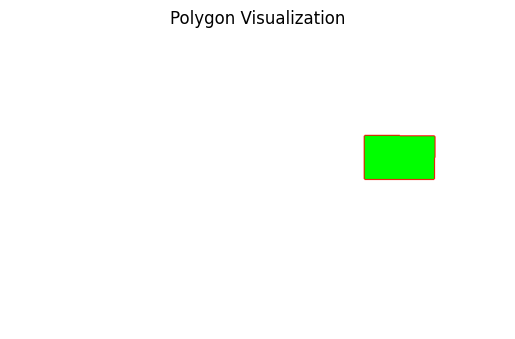

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Input coordinates
bbox_points = [
    (715, 211),
    (715, 297),
    (854, 297),
    (855, 212),
]

# Create a white background
image_height, image_width = 600, 1000
background = np.ones((image_height, image_width, 3), dtype=np.uint8) * 255

# Convert points to integer and reshape for cv2
polygon = np.array(bbox_points, np.int32).reshape((-1, 1, 2))

# Draw the polygon on the image
cv2.polylines(background, [polygon], isClosed=True, color=(0, 0, 255), thickness=3)
cv2.fillPoly(background, [polygon], color=(0, 255, 0))

# Convert BGR to RGB for plt
background_rgb = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(background_rgb)
plt.axis('off')  # Turn off axis
plt.title("Polygon Visualization")
plt.show()


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

ann_path = r"/media/cow/User/Python/CNN_model/dataset/ann"
save_ = r"/media/cow/User/Python/CNN_model/dataset/test_bbox"

for csv_file in os.listdir(ann_path):
    if not csv_file.endswith(".csv"):
        continue
    print(f"Processing: {csv_file}")
    
    df = pd.read_csv(os.path.join(ann_path, csv_file))
    
    image_path = os.path.join(ann_path, csv_file[:-4] + ".bmp")
    if not os.path.exists(image_path):
        print(f"Image file not found for: {csv_file}")
        continue
    
    background = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    for _, row in tqdm(df.iterrows(), total=len(df)):
        bbox_points = [
            (row['Top_Left_X'], row['Top_Left_Y']),
            (row['Top_Right_X'], row['Top_Right_Y']),
            (row['Bottom_Right_X'], row['Bottom_Right_Y']),
            (row['Bottom_Left_X'], row['Bottom_Left_Y']),
        ]
        bbox_points = [(int(point[0]), int(point[1])) for point in bbox_points]
        polygon = np.array([bbox_points], dtype=np.int32)
        
        cv2.polylines(background, [polygon], isClosed=True, color=(0, 0, 255), thickness=3)
    
    output_path = os.path.join(save_, csv_file[:-4] + ".bmp")
    os.makedirs(save_, exist_ok=True)
    cv2.imwrite(output_path, background)

print("Processing complete!")


Processing: 481.csv


100%|██████████| 1073/1073 [00:00<00:00, 20693.90it/s]


Processing: 482.csv


100%|██████████| 1073/1073 [00:00<00:00, 24671.97it/s]


Processing: 483.csv


100%|██████████| 1073/1073 [00:00<00:00, 23212.03it/s]


Processing: 484.csv


100%|██████████| 1073/1073 [00:00<00:00, 15790.02it/s]


Processing: 485.csv


100%|██████████| 1073/1073 [00:00<00:00, 21505.35it/s]


Processing: 486.csv


100%|██████████| 1073/1073 [00:00<00:00, 16693.89it/s]


Processing: 487.csv


100%|██████████| 1073/1073 [00:00<00:00, 19021.83it/s]


Processing: 488.csv


100%|██████████| 1073/1073 [00:00<00:00, 18492.67it/s]


Processing: 489.csv


100%|██████████| 1073/1073 [00:00<00:00, 19909.35it/s]


Processing: 490.csv


100%|██████████| 1073/1073 [00:00<00:00, 22094.79it/s]


Processing: 491.csv


100%|██████████| 1073/1073 [00:00<00:00, 19170.92it/s]


Processing: 492.csv


100%|██████████| 1073/1073 [00:00<00:00, 20064.15it/s]


Processing: 493.csv


100%|██████████| 1073/1073 [00:00<00:00, 20009.46it/s]


Processing: 494.csv


100%|██████████| 1073/1073 [00:00<00:00, 20519.35it/s]


Processing: 495.csv


100%|██████████| 1073/1073 [00:00<00:00, 18256.52it/s]


Processing: 496.csv


100%|██████████| 1073/1073 [00:00<00:00, 15044.05it/s]


Processing: 497.csv


100%|██████████| 1073/1073 [00:00<00:00, 21531.27it/s]


Processing: 498.csv


100%|██████████| 1073/1073 [00:00<00:00, 21411.42it/s]


Processing: 499.csv


100%|██████████| 1073/1073 [00:00<00:00, 16214.00it/s]


Processing: 500.csv


100%|██████████| 1073/1073 [00:00<00:00, 16800.83it/s]


Processing: 501.csv


100%|██████████| 1073/1073 [00:00<00:00, 19034.38it/s]


Processing: 468.csv


100%|██████████| 1073/1073 [00:00<00:00, 19115.47it/s]


Processing: 469.csv


100%|██████████| 1073/1073 [00:00<00:00, 19257.46it/s]


Processing: 470.csv


100%|██████████| 1073/1073 [00:00<00:00, 21742.01it/s]


Processing: 471.csv


100%|██████████| 1073/1073 [00:00<00:00, 18644.13it/s]


Processing: 472.csv


100%|██████████| 1073/1073 [00:00<00:00, 16261.40it/s]


Processing: 473.csv


100%|██████████| 1073/1073 [00:00<00:00, 18332.52it/s]


Processing: 474.csv


100%|██████████| 1073/1073 [00:00<00:00, 18409.54it/s]


Processing: 475.csv


100%|██████████| 1073/1073 [00:00<00:00, 20216.28it/s]


Processing: 476.csv


100%|██████████| 1073/1073 [00:00<00:00, 16598.09it/s]


Processing: 477.csv


100%|██████████| 1073/1073 [00:00<00:00, 22302.83it/s]


Processing: 478.csv


100%|██████████| 1073/1073 [00:00<00:00, 20288.74it/s]


Processing: 479.csv


100%|██████████| 1073/1073 [00:00<00:00, 21782.00it/s]


Processing: 480.csv


100%|██████████| 1073/1073 [00:00<00:00, 15860.19it/s]

Processing complete!


In [1]:
# split bbox from data
import os
import cv2
import pandas as pd
from tqdm import tqdm

input_folder = r"/media/cow/User/Python/CNN_model/dataset/ann"
output_folder = r"/media/cow/User/Python/CNN_model/dataset/test_bbox_split"

os.makedirs(output_folder, exist_ok=True)

for csv_file in os.listdir(input_folder):
    if not csv_file.endswith(".csv"):
        continue
    print(f"Processing: {csv_file}")
    
    df = pd.read_csv(os.path.join(input_folder, csv_file))
    
    image_path = os.path.join(input_folder, csv_file[:-4] + ".bmp")
    if not os.path.exists(image_path):
        print(f"Image file not found for: {csv_file}")
        continue
    
    background = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        bbox_points = [
            (row['Top_Left_X'], row['Top_Left_Y']),
            (row['Top_Right_X'], row['Top_Right_Y']),
            (row['Bottom_Right_X'], row['Bottom_Right_Y']),
            (row['Bottom_Left_X'], row['Bottom_Left_Y']),
        ]
        bbox_points = [(int(point[0]), int(point[1])) for point in bbox_points]

        overlap = 30
        top_left = (bbox_points[0][0] - overlap, bbox_points[0][1] - overlap)
        top_right = (bbox_points[1][0] + overlap, bbox_points[1][1] - overlap)
        bottom_right = (bbox_points[2][0] + overlap, bbox_points[2][1] + overlap)
        bottom_left = (bbox_points[3][0] - overlap, bbox_points[3][1] + overlap)
        new_bbox_points = [top_left, top_right, bottom_right, bottom_left]
        
        x_min = max(min(p[0] for p in new_bbox_points), 0)
        x_max = min(max(p[0] for p in new_bbox_points), background.shape[1])
        y_min = max(min(p[1] for p in new_bbox_points), 0)
        y_max = min(max(p[1] for p in new_bbox_points), background.shape[0])
        
        cropped_image = background[y_min:y_max, x_min:x_max]
        
        output_image_path = os.path.join(output_folder, f"{csv_file[:-4]}_{idx}.bmp")
        cv2.imwrite(output_image_path, cropped_image)
        
        



Processing: 481.csv


100%|██████████| 1073/1073 [00:00<00:00, 7060.51it/s]


Processing: 482.csv


100%|██████████| 1073/1073 [00:00<00:00, 5959.79it/s]


Processing: 483.csv


100%|██████████| 1073/1073 [00:00<00:00, 5752.44it/s]


Processing: 484.csv


100%|██████████| 1073/1073 [00:00<00:00, 7127.50it/s]


Processing: 485.csv


100%|██████████| 1073/1073 [00:00<00:00, 6606.03it/s]


Processing: 486.csv


100%|██████████| 1073/1073 [00:00<00:00, 6016.75it/s]


Processing: 487.csv


100%|██████████| 1073/1073 [00:00<00:00, 5810.19it/s]


Processing: 488.csv


100%|██████████| 1073/1073 [00:00<00:00, 6891.13it/s]


Processing: 489.csv


100%|██████████| 1073/1073 [00:00<00:00, 5862.64it/s]


Processing: 490.csv


100%|██████████| 1073/1073 [00:00<00:00, 6448.07it/s]


Processing: 491.csv


100%|██████████| 1073/1073 [00:00<00:00, 3589.75it/s]


Processing: 492.csv


100%|██████████| 1073/1073 [00:00<00:00, 6825.35it/s]


Processing: 493.csv


100%|██████████| 1073/1073 [00:00<00:00, 6105.83it/s]


Processing: 494.csv


100%|██████████| 1073/1073 [00:00<00:00, 6743.04it/s]


Processing: 495.csv


100%|██████████| 1073/1073 [00:00<00:00, 4663.39it/s]


Processing: 496.csv


100%|██████████| 1073/1073 [00:00<00:00, 7250.27it/s]


Processing: 497.csv


100%|██████████| 1073/1073 [00:00<00:00, 7847.52it/s]


Processing: 498.csv


100%|██████████| 1073/1073 [00:00<00:00, 7066.55it/s]


Processing: 499.csv


100%|██████████| 1073/1073 [00:00<00:00, 8068.95it/s]


Processing: 500.csv


100%|██████████| 1073/1073 [00:00<00:00, 8191.06it/s]


Processing: 501.csv


100%|██████████| 1073/1073 [00:00<00:00, 6950.16it/s]


Processing: 468.csv


100%|██████████| 1073/1073 [00:00<00:00, 5233.08it/s]


Processing: 469.csv


100%|██████████| 1073/1073 [00:00<00:00, 7866.69it/s]


Processing: 470.csv


100%|██████████| 1073/1073 [00:00<00:00, 7914.52it/s]


Processing: 471.csv


100%|██████████| 1073/1073 [00:00<00:00, 2795.93it/s]


Processing: 472.csv


100%|██████████| 1073/1073 [00:00<00:00, 4705.81it/s]


Processing: 473.csv


100%|██████████| 1073/1073 [00:00<00:00, 3986.62it/s]


Processing: 474.csv


100%|██████████| 1073/1073 [00:00<00:00, 4524.68it/s]


Processing: 475.csv


100%|██████████| 1073/1073 [00:00<00:00, 2511.54it/s]


Processing: 476.csv


100%|██████████| 1073/1073 [00:00<00:00, 3126.27it/s]


Processing: 477.csv


100%|██████████| 1073/1073 [00:00<00:00, 2827.96it/s]


Processing: 478.csv


100%|██████████| 1073/1073 [00:00<00:00, 2351.17it/s]


Processing: 479.csv


100%|██████████| 1073/1073 [00:00<00:00, 2342.07it/s]


Processing: 480.csv


100%|██████████| 1073/1073 [00:00<00:00, 2935.46it/s]


In [ ]:
import numpy as np
import cv2
import os
from tqdm import tqdm

ann_split_data = r"/media/cow/User/Python/CNN_model/dataset/test_bbox_split"
output_folder = r"/media/cow/User/Python/CNN_model/dataset/test_bbox_masks"
os.makedirs(output_folder, exist_ok=True)

for file in tqdm(os.listdir(ann_split_data)):
    if not file.endswith((".bmp", ".jpg", ".png")):
        continue
    
    img = cv2.imread(os.path.join(ann_split_data, file), cv2.IMREAD_COLOR)
    h, w = img.shape[:2]
    
    black_background = np.zeros((h, w, 3), dtype=np.uint8)
    
    mask_bbox_points = [
        (27, 27),
        (w - 27, 27),
        (w - 27, h - 27),
        (27, h - 27)
    ]
    
    polygon = np.array(mask_bbox_points, np.int32).reshape((-1, 1, 2))
    cv2.polylines(black_background, [polygon], isClosed=True, color=(255, 255, 255), thickness=3)
    cv2.fillPoly(black_background, [polygon], color=(255, 255, 255))
    output_path = os.path.join(output_folder, file[:-4] + "_mask.bmp")
    cv2.imwrite(output_path, black_background)



100%|██████████| 36482/36482 [00:21<00:00, 1710.26it/s]
